# Stick Breaking Example

   Dirichlet Process is a useful prior distribution on mixture models. The stick breaking construction describes the generation of mixture model parameters. In this example we have provided a small code which demonstrates this generation.


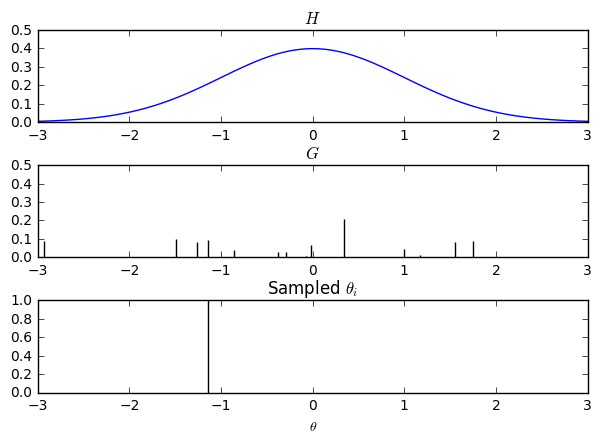

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
import numpy
from IPython.core.debugger import Tracer;

# alpha is 
# w is total weight, truncate is truncation level
# It returns stick lengths
def stickBreaking(alpha,w=1,truncate=50): 
    #print(w)
    if (truncate == 0):
        return [w]
    betap = numpy.random.beta(1,alpha)
    #Tracer()() 
    betai = [w*betap]
    w = w-betai[0] #remaining part
    #print(' '+str(w)+' '+str(betap[0])+' '+str(1-betap[0]))
    betai.extend(stickBreaking(alpha,w,truncate-1))
    return betai

    

mu = 0
sigma = 1
T = 50 # Truncation level
alpha = 5 # DP parameter

fig, ((ax1, ax2,ax3)) = plt.subplots(nrows=3, ncols=1)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.2)

ax1.set_xlim([-3,3])
x = np.linspace(-3, 3, 100)
ax1.plot(x,mlab.normpdf(x, mu, sigma))
ax1.set_title(r'$H$')
ax1.set_yticks(np.arange(0,0.6,0.1))

ax2.set_xlim([-3,3])
s = np.random.normal(mu, sigma,T+1)
#plt.plot(s)
betas = np.array(stickBreaking(alpha))
ax2.vlines(s,np.zeros((T,1)),betas)
ax2.set_title(r'$G$')
ax2.set_yticks(np.arange(0,0.6,0.1))

ax3.set_xlim([-3,3])
theta=np.random.multinomial(1,betas)
plt.vlines(s[theta==1],0,1)
ax3.set_title(r'Sampled $\theta_i$')
ax3.set_xlabel(r'$\theta$')
ax3.set_yticks(np.arange(0,1.2,0.2))
plt.show()

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)
#print(betas)
#print(s[theta==1])